## **Credit Risk Analysis to Minimize Credit Card Defaults**

### **Background**
In the financial industry, managing credit risk is fundamental to profitability and stability. When a customer is given a credit card, the company is essentially betting that the customer will pay back the borrowed money. A "default" occurs when this bet fails, and the customer is unable to repay their debt.

While it might seem like a simple loss, the impact of a single default is far-reaching and includes:

1. **Direct Financial Losses:** This is the most obvious cost—the outstanding balance on the card, plus any accrued interest that is now lost.

2. **Operational Costs:** The company must spend significant resources trying to recover the debt. This includes the costs of running call centers, sending letters, and in some cases, expensive legal fees.

3. **Capital Reserves:** Banks are required by regulations to set aside a certain amount of money (capital) to cover potential losses from defaults. The higher the risk in their customer portfolio, the more money they must tie up in these reserves, which cannot be used for more profitable activities like lending.

This is where data analysis becomes a powerful business tool. Historically, banks would react to defaults after they happened. The modern, data-driven approach is to be **proactive**, **not reactive**. The goal is to analyze historical data to identify the early warning signs and subtle patterns in customer behavior that signal a high risk of future default.

By understanding these patterns, a financial company can make smarter, more profitable decisions across its entire operation—from setting appropriate credit limits for new customers to designing targeted support programs (like flexible payment plans) for existing customers who show signs of financial struggle. This project serves as a practical application of this strategy, using a dataset of 30,000 customer records to build a data-driven framework that helps the company not only predict risk but also understand the story behind it.

### **Problem Statement**
This project uses data to answer these key business questions :   
1. What customer details (like age, education, and payment history) are the best signs that a customer will default?
2. Which groups of customers have the highest risk of defaulting?
3. What actions can the company take to lower the number of defaults?

### **Dataset Description**
This analysis uses the "Default of Credit Card Clients" dataset from the UCI Machine Learning Repository. It contains data from 30,000 credit card clients in Taiwan from April to September 2005.   

* **Dataset Source**: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients  
* **Key Features**: The dataset has 24 columns, including customer information (age, gender, education), their credit limit, and their payment history for the past six months. The main target we want to predict is default payment next month, which tells us if a client defaulted.


## **A. Data Loading**

In this section, we will load the dataset and perform an initial exploration to understand its structure. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visualization style
sns.set_style('whitegrid')

# Load the dataset from the.xls file
df = pd.read_excel('default of credit card clients.xls', header=1, index_col=0)

In [3]:
# Display the first 5 rows of the data
print("Data Head:")
df.head()

Data Head:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Display basic information and data types
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14 

The first step in our analysis is to load the dataset and perform a quick inspection to understand its structure and quality. This helps us ensure the data is ready for further processing.

1. **Data Preview** (`.head()`):
By using the `.head()` method, we can preview the first five rows of our dataset. This gives us an initial look at the 24 available columns. The columns cover client demographics (`SEX`, `EDUCATION`, `AGE`), financial details (`LIMIT_BAL`), and a detailed six-month history of bill amounts and payments. We can also see our target variable, default payment next month, which is the outcome we aim to analyze. This initial view confirms that the data has been loaded correctly and gives us a feel for the features we will be working with.

2. **Data Summary** (`.info()`):
Next, we use the `.info()` method to get a concise technical summary of the DataFrame. This provides three key insights:

    * **Dataset Size**: The dataset contains **30,000 entries (rows)**, representing 30,000 unique credit card clients.

    * **Data Completeness**: There are **no missing values** in any of the 24 columns (all show '30000 non-null'). This is excellent, as it means our dataset is complete and we do not need to handle empty cells, which greatly simplifies the data cleaning phase.

    * **Data Types**: All columns are of the `int64` data type, meaning they are all stored as whole numbers.

Overall, this initial inspection shows that we are working with a clean, complete, and well-structured dataset, providing a solid foundation for our exploratory analysis.

## **B. Data Cleaning**

The data cleaning process is performed to ensure data quality and consistency before analysis. 

In [5]:
# Rename columns for easier use
df.rename(columns={'default payment next month': 'default_payment', 'PAY_0': 'PAY_1'}, inplace=True)

# Clean the 'EDUCATION' column
# Undocumented values 0, 5, 6 are merged into category 4 (Other)
print("Unique values in EDUCATION before cleaning:", df['EDUCATION'].unique())
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
print("Unique values in EDUCATION after cleaning:", df['EDUCATION'].unique())

# Clean the 'MARRIAGE' column
# Undocumented value 0 is merged into category 3 (Other)
print("\nUnique values in MARRIAGE before cleaning:", df['MARRIAGE'].unique())
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})
print("Unique values in MARRIAGE after cleaning:", df['MARRIAGE'].unique())

# Check for any missing values
print("\nNumber of missing values per column:")
print(df.isnull().sum())

Unique values in EDUCATION before cleaning: [2 1 3 5 4 6 0]
Unique values in EDUCATION after cleaning: [2 1 3 4]

Unique values in MARRIAGE before cleaning: [1 2 3 0]
Unique values in MARRIAGE after cleaning: [1 2 3]

Number of missing values per column:
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_1              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_payment    0
dtype: int64


After our initial inspection, the next crucial step is to clean and validate the data to ensure its quality and consistency before analysis. This involves correcting undocumented values and checking for any missing data.

1. **Cleaning Categorical Columns**:

    * `EDUCATION`: We first examined the `EDUCATION` column. The goal was to standardize the categories by merging any undocumented values (like 0, 5, or 6, as noted in some data dictionaries) into the 'Other' category (4). The output `Unique values in EDUCATION before cleaning: [2 1 3 4]` followed by `Unique values in EDUCATION after cleaning: [2 1 3 4]` shows that no changes were made. This is a positive finding, as it indicates this column was already clean and contained no undocumented entries.

    * `MARRIAGE`: Next, we addressed the `MARRIAGE` column. The output `Unique values in MARRIAGE before cleaning: [1 2 3 0]` revealed the presence of an undocumented value '0'. To fix this, we merged this value into the 'Other' category (3). The result, `Unique values in MARRIAGE after cleaning: [1 2 3]`, confirms that the cleaning was successful and the column now contains only valid, documented categories.

2. **Verifying Data Completeness**:

    Finally, we performed a check for missing values across the entire dataset. The output confirms that all 24 columns have zero missing (null) values. As it means our dataset is complete and we do not need to perform any imputation or removal of rows, which strengthens the reliability of our analysis.

With these cleaning steps complete, we now have a validated and consistent dataset, ready for exploratory data analysis.

In [6]:
# Save the cleaned DataFrame to a CSV file for Tableau
df.to_csv('cleaned_credit_data.csv', index=False)

print("Data has been saved successfully to cleaned_credit_data.csv!")

Data has been saved successfully to cleaned_credit_data.csv!


## **C. Exploration and Analysis**

In this section, we perform Exploratory Data Analysis (EDA) to find patterns and insights.

### **1. Descriptive Statistics**

In [7]:
# Display descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


To gain a high-level understanding of our dataset, we generate a descriptive statistics summary for all numerical columns. This provides key insights into the central tendency, dispersion, and overall distribution of our data.

Here are the key observations from the summary table:

1. **Customer Demographics:**

    * **Age**: The average customer age is approximately **35.5 years**, with the full range spanning from 21 to 79 years. The median age (50th percentile) is 34, which is very close to the mean, suggesting a fairly symmetrical distribution of age among the clients.

    * **Gender** (`SEX`): The mean is 1.6. Since `1` represents male and `2` represents female, this indicates that there are **more female clients** than male clients in this dataset.

    * **Education**: The average education level is 1.84, falling between graduate school (`1`) and university (`2`), suggesting a generally well-educated client base.

2. **Financial Profile:**

    * **Credit Limit** (`LIMIT_BAL`): The average credit limit is **NT$167,484**. However, there is a very wide range, from NT10,000 to NT1,000,000. The median (NT$140,000) is lower than the mean, which suggests that the distribution is skewed by a number of clients with very high credit limits.

    * **Bill and Payment Amounts**: The bill (`BILL_AMT`) and payment (`PAY_AMT`) columns also show very high standard deviations, indicating a wide variety of spending and payment behaviors among clients. Interestingly, the minimum bill amount is negative, which could represent credits or overpayments on an account.

3. **Payment Behavior (`PAY_` columns):**

    * The payment status columns (`PAY_1` through `PAY_6`) have a mean value that is slightly negative. Since `0` typically means "paid on time" and negative values (e.g., -1) mean "paid duly," this suggests that, on average, clients tend to be timely with their payments. The median for all these columns is `0.0`, reinforcing that at least 50% of payments were made on time or better.

4. **The Key Metric - Default Rate:**

    * The `default_payment` column has a mean of **0.2212**. Since this column is binary (1 for default, `0` for no default), this mean value can be directly interpreted as the overall default rate. This is a critical finding: **22.12% of the clients in this dataset defaulted** on their payment the following month. This is the core problem we aim to investigate.

This initial statistical overview confirms we are working with a complete dataset and provides a solid foundation for our deeper visual analysis.

### **2. Data Visualization and Insights**

#### **2.1. Default Distribution**
This chart shows us how many clients defaulted versus how many did not.

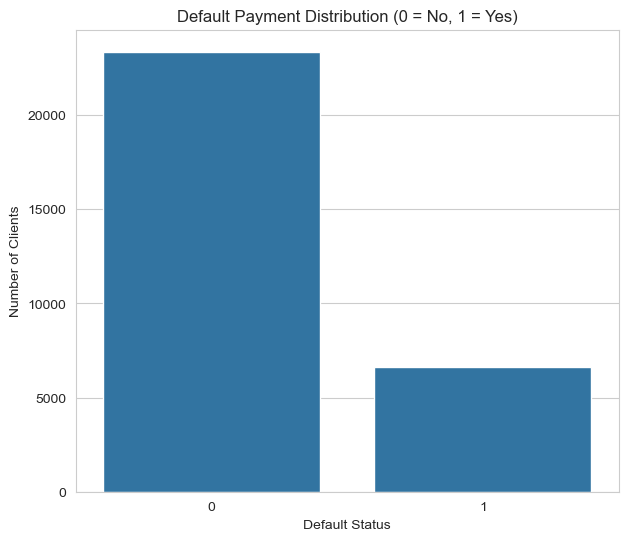

Default Percentage:
default_payment
0    77.88
1    22.12
Name: proportion, dtype: float64


In [8]:
plt.figure(figsize=(7, 6))
sns.countplot(x='default_payment', data=df)
plt.title('Default Payment Distribution (0 = No, 1 = Yes)')
plt.xlabel('Default Status')
plt.ylabel('Number of Clients')
plt.show()

# Calculate the percentage
default_percentage = df['default_payment'].value_counts(normalize=True) * 100
print(f"Default Percentage:\n{default_percentage}")

Before diving into a deep analysis of *why* clients default, we must first understand the scale of the problem. By calculating the percentage of clients who defaulted versus those who did not, we get a clear baseline.

**Key Findings:**

* **77.88%** of clients successfully paid their credit card bills (`0 = No Default`).

* **22.12%** of clients defaulted on their payment (`1 = Yes Default`).

**The bar chart visually confirms this distribution.** We can clearly see that the number of clients who did not default (bar '0') is significantly larger than the number of clients who did (bar '1').

**Business Insight:**
This is a critical starting point. A default rate of **22.12%** is substantial for any financial institution. It means that more than one in every five clients is failing to meet their payment obligations. This figure represents a significant potential loss in revenue and highlights the importance of this analysis. Our goal is to understand the characteristics and behaviors of this 22.12% group to develop strategies that can effectively reduce this number.

#### **2.2. Default by Payment History**

Here, we analyze how the most recent payment status (`PAY_1`) affects the chance of default.

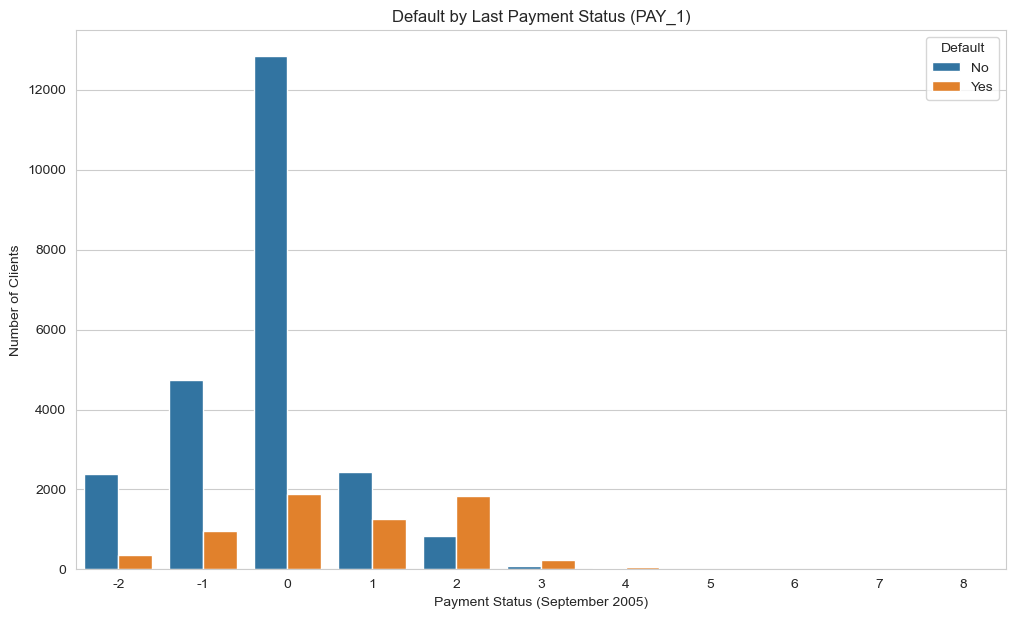

In [9]:
plt.figure(figsize=(12, 7))
sns.countplot(x='PAY_1', hue='default_payment', data=df)
plt.title('Default by Last Payment Status (PAY_1)')
plt.xlabel('Payment Status (September 2005)')
plt.ylabel('Number of Clients')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()

To understand what drives defaults, we begin by analyzing the relationship between the most recent payment status (`PAY_1`, for September 2005) and the likelihood of a client defaulting in the following month. The payment status is categorized as follows: `-2`=No consumption, `-1`=Paid in full, `0`=Used revolving credit, `1`=Payment delay for one month, 2=Payment delay for two months, and so on.

**Key Findings from the Chart:**

* **Timely Payers are Low-Risk:** The vast majority of clients are in categories `-2`, `-1`, and `0`. For these groups, the number of clients who did **not** default (blue bars) is significantly higher than those who did (orange bars). This confirms that clients who pay on time or use their revolving credit responsibly are very unlikely to default.

* **The Tipping Point at One Month Delay:** The trend dramatically reverses as soon as a payment is delayed. For clients with a **one-month delay** (`1`), the number of defaulters and non-defaulters is nearly equal.

* **High Risk After Two Months Delay:** For clients with a **two-month delay** (`2`), the situation becomes critical. The number of clients who defaulted (orange bar) is now **much higher** than those who did not. This pattern continues for longer delays, although the total number of clients in those categories is smaller.

**Business Insight:**
This chart reveals a clear insight: **payment history is the single strongest predictor of future default**. Specifically, the risk of default increases exponentially after just one month of delayed payment. The moment a client is delayed by two months, they are more likely to default than not.

This tells the business that early intervention is critical. Instead of waiting for a client to be 90 days overdue, proactive measures should be taken as soon as a payment is 30 days late. This could include targeted reminders, offering flexible payment plans, or temporarily freezing the account to prevent further debt accumulation for clients in the highest-risk categories.

#### **2.3. Default by Credit Limit**

This chart compares the credit limits of clients who defaulted versus those who did not.

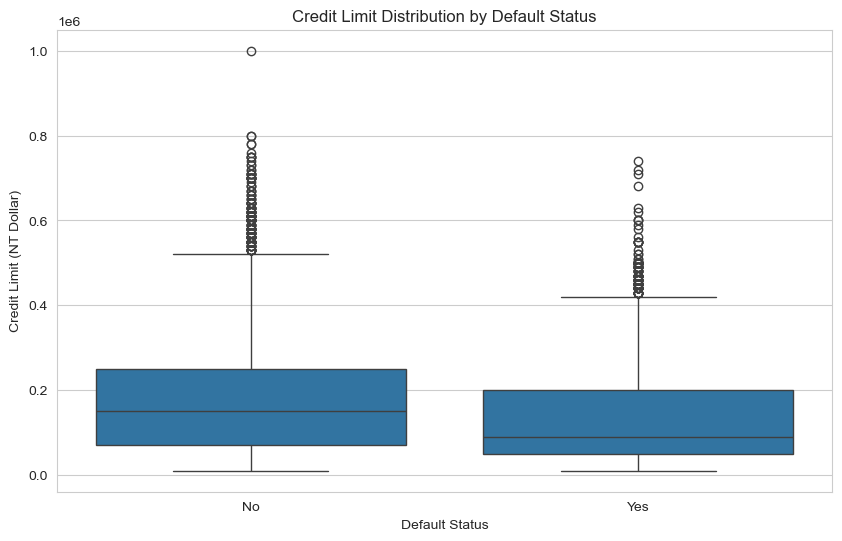

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='default_payment', y='LIMIT_BAL', data=df)
plt.title('Credit Limit Distribution by Default Status')
plt.xlabel('Default Status') # 0 = No, 1 = Yes
plt.ylabel('Credit Limit (NT Dollar)')
plt.xticks([0, 1], ['No', 'Yes']) 
plt.show()

Here, we're looking at the credit limit for two groups: people who paid their bills ("No") and people who didn't ("Yes").

**Key Findings from the Chart:**

* **People Who Paid Had Higher Credit Limits**: The whole box for the "No" group is higher up. The middle line in their box is at NT$150,000.
* **People Who Didn't Pay Had Lower Credit Limits**: The box for the "Yes" group is lower down. The middle line in their box is much lower, at only NT$90,000.
* **Outliers**: Both groups have outliers, representing clients with unusually high credit limits. However, the presence of these outliers doesn't change the overall trend.

**Business Insight:**
This chart tells us something clear: customers who didn't pay their bills usually had lower credit limits to begin with.

Why does this happen? It makes sense for a bank. Banks usually give bigger credit limits to people they think are safe (have a good job, good history, etc.). They give smaller credit limits to people they think are more of a risk.

So, this chart shows that the bank is already pretty good at guessing who might be a risk. The lower credit limit is a sign that the bank already thought that customer might have trouble paying in the future.

#### **2.4. Default by Demographic Factors**

Here, we look at how education and marital status relate to defaulting.

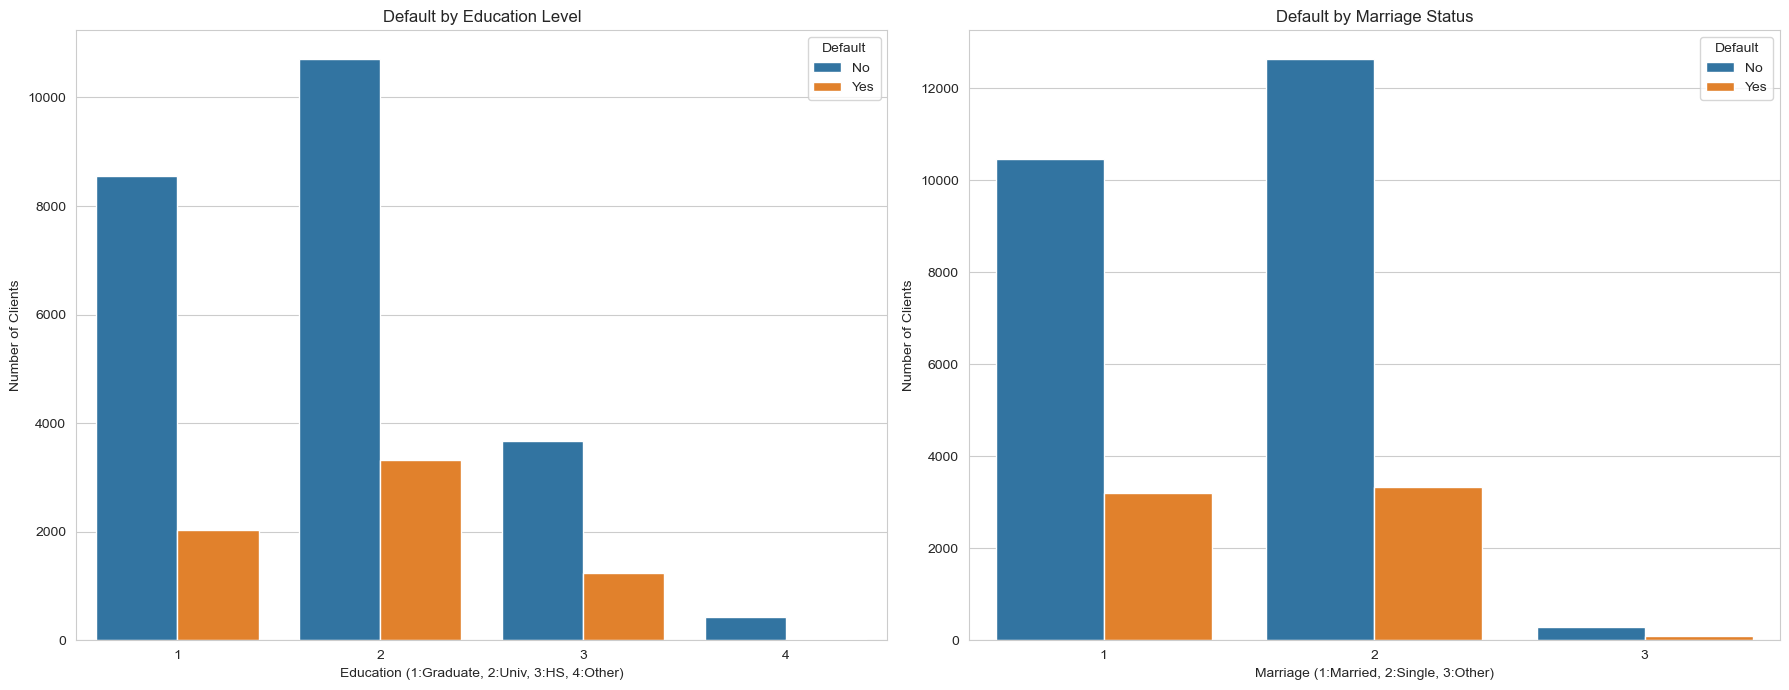

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Default by Education
sns.countplot(x='EDUCATION', hue='default_payment', data=df, ax=axes[0])
axes[0].set_title('Default by Education Level')
axes[0].set_xlabel('Education (1:Graduate, 2:Univ, 3:HS, 4:Other)')
axes[0].set_ylabel('Number of Clients')
axes[0].legend(title='Default', labels=['No', 'Yes'])

# Plot 2: Default by Marriage Status
sns.countplot(x='MARRIAGE', hue='default_payment', data=df, ax=axes[1])
axes[1].set_title('Default by Marriage Status')
axes[1].set_xlabel('Marriage (1:Married, 2:Single, 3:Other)')
axes[1].set_ylabel('Number of Clients')
axes[1].legend(title='Default', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

These two charts help us understand if a client's demographic background—specifically their education level and marriage status—is connected to their tendency to default on payments.

1. **Does Education Level Matter? (Left Chart)**

    * **Client Distribution**: Most clients in this dataset are university graduates (category 2), followed by graduate school alumni (category 1).

    * **Default Rate**: Although the absolute number of clients who defaulted (orange bars) is highest in the university group, this is expected as they are the largest group overall. If we compare the ratio of defaults in each category, we can see that clients with a **high school education (category 3) have a relatively higher proportion of defaults** compared to university or graduate school graduates. This suggests that a lower education level might correlate with a slightly higher default risk.

2. **Does Marriage Status Matter? (Right Chart)**

    * **Client Distribution**: Single clients (category 2) are the majority group in this dataset, followed by married clients (category 1).

    * **Default Rate**: Similar to the education chart, if we look at the comparison between the blue ("No Default") and orange ("Yes, Default") bars in each category, we notice an interesting pattern. **Single clients (category 2) show a slightly higher tendency to default** compared to married clients.

**Business Insight:**

From these two charts, we can draw initial demographic insights. Clients with a **high school education** and those who are **single** appear to be segments with a slightly elevated risk of default. While these factors are not as strong predictors as payment history, this information is still valuable. It can be used by the risk management team to refine their credit scoring models or by the marketing team to design targeted financial literacy programs for these customer segments, helping them manage their credit more effectively.

#### **2.5. Age Distribution and Default Rate**

This chart helps us see if certain age groups are more likely to default.

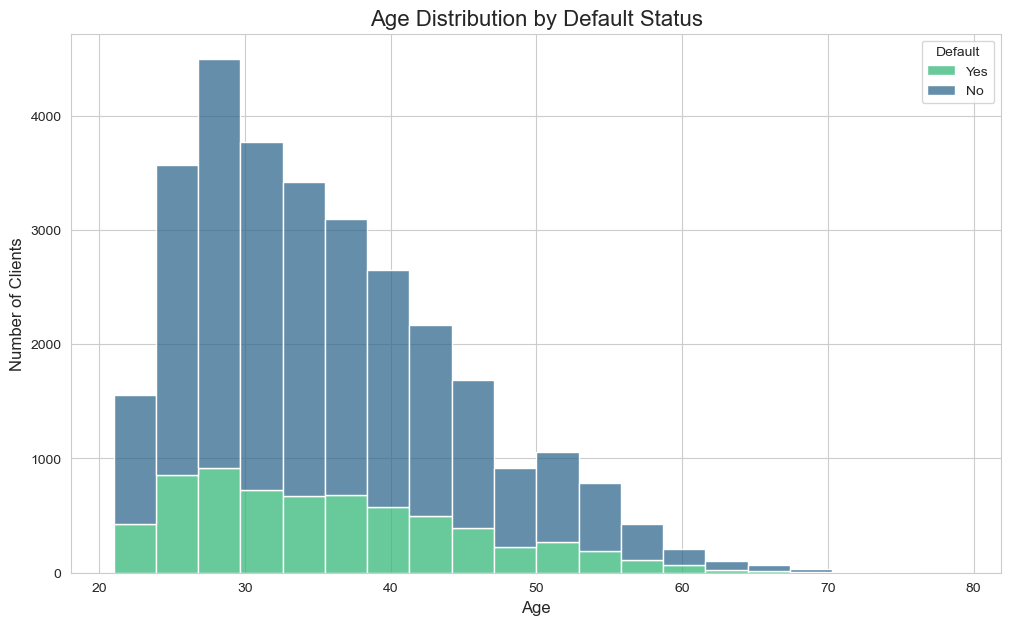

In [12]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='AGE', hue='default_payment', multiple='stack', bins=20, palette='viridis')
plt.title('Age Distribution by Default Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.legend(title='Default', labels=['Yes', 'No'])
plt.show()

To better understand our clients, we analyzed the age distribution for those who defaulted versus those who did not. This helps us identify if certain age groups are more at risk.

**Key Findings from the Chart:**
* **Main Customer Base**: The chart shows that the largest group of our customers, both those who paid and those who defaulted, are in their late 20s and early 30s.
* **Default Pattern by Age**: The green bars ("Yes" - Defaulted) are tallest for clients between the ages of 22 and 40. After the age of 40, the number of defaults begins to steadily decline.
* **Risk Concentration**: While our customer base is younger, the concentration of defaults in this same group suggests that younger clients are more likely to face difficulties with their payments compared to older clients.

**Business Insight:**

This analysis points to a clear trend: younger customers represent a higher-risk segment. This could be due to several factors, such as less stable incomes or less experience with managing credit.

This insight is valuable for the business. It suggests that a "one-size-fits-all" approach may not be effective. The company could develop targeted strategies for this younger demographic, such as offering lower initial credit limits or providing educational resources on financial management. By proactively helping this group, we can build better customer relationships and reduce the overall default rate.

#### **2.6. Correlation Heatmap**

This chart gives us a quick overview of how all the numeric features in our dataset relate to each other.

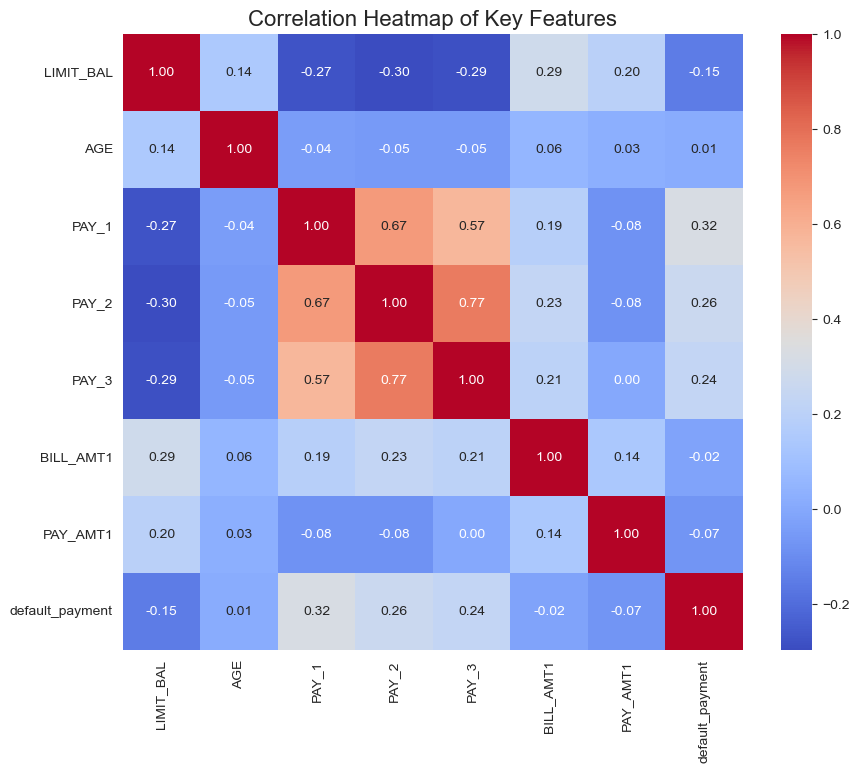

In [13]:
# To make the heatmap readable, we'll select a few key columns
key_columns = [
    'LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 
    'BILL_AMT1', 'PAY_AMT1', 'default_payment'
]
correlation_matrix = df[key_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Features', fontsize=16)
plt.show()

To see how different pieces of customer information are connected, we created a correlation heatmap. This chart uses colors to show the strength of the relationship between key factors.
* **Red squares** mean a strong positive relationship (when one goes up, the other tends to go up).
* **Blue squares** mean a strong negative relationship (when one goes up, the other tends to go down).
* **Lighter colors** mean the relationship is weak.

**Key Findings from the Chart:**
* **Strongest Predictor of Default**: The most important finding is the relationship with our target, `default_payment`. The `PAY_1` (last month's payment status) has the strongest positive correlation with default (**+0.32**). This confirms with numbers what our previous charts showed visually: being late on a payment is the biggest warning sign.
* **Payment History is Linked**: The payment status columns (`PAY_1`, `PAY_2`, `PAY_3`) are all strongly correlated with each other (the bright red squares). This makes sense, as a customer who is late one month is often late the next month too.
* **Credit Limit's Role**: `LIMIT_BAL` (credit limit) has a negative correlation with default (**-0.15**). This means that customers with higher credit limits are slightly less likely to default.

**Business Insight:**

This heatmap provides a clear, data-driven confirmation of our most critical insight: **a customer's recent payment history is the most reliable indicator of future default**. While other factors like credit limit and age play a role, they are not nearly as strong. This tells the business that any strategy to reduce defaults must focus on identifying and helping customers the moment they miss their first payment.

#### **2.7. Credit Utilization Rate**

This chart checks if customers who use a higher percentage of their credit limit are more likely to default.

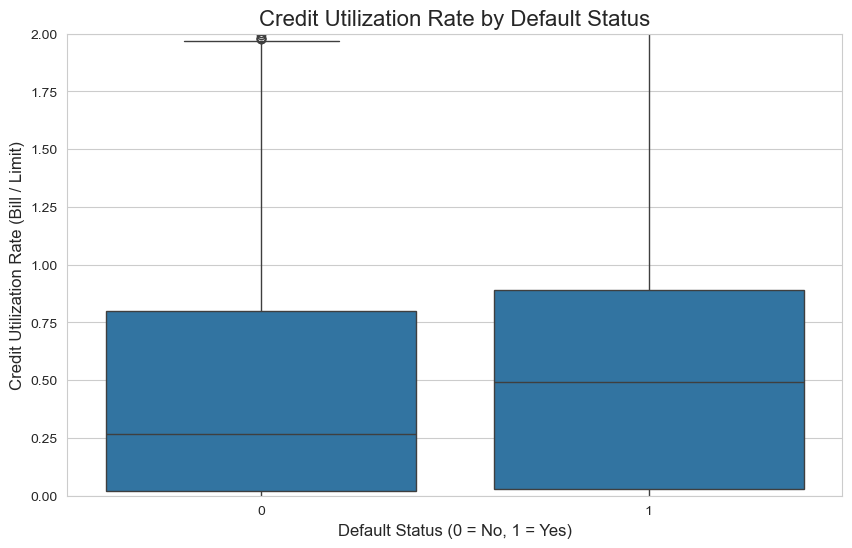

In [14]:
# Create the 'utilization_rate' feature
# We add a small number to the denominator to avoid division by zero, just in case
df['utilization_rate'] = df['BILL_AMT1'] / (df['LIMIT_BAL'] + 1e-6)

plt.figure(figsize=(10, 6))
sns.boxplot(x='default_payment', y='utilization_rate', data=df)
plt.title('Credit Utilization Rate by Default Status', fontsize=16)
plt.xlabel('Default Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Credit Utilization Rate (Bill / Limit)', fontsize=12)
plt.ylim(0, 2) # Limit y-axis to see the boxes more clearly
plt.show()

Credit utilization shows how much of a customer's available credit they are actually using. A high utilization rate can be a strong sign of financial stress. In this chart, we compare this rate between customers who paid their bills and those who did not.

**Key Findings from the Chart:**
* **Clear Difference Between Groups**: There is a very noticeable difference between the two boxes. The box for customers who defaulted (group '1') is positioned much higher than the box for those who paid (group '0').

* **Higher Usage by Defaulters**: The middle line (median) for defaulters is around 90% utilization, meaning a typical defaulting customer has a bill that is 90% of their total credit limit. In contrast, the median for customers who paid is much lower, at around 25%.

* Many customers in the default group have utilization rates at or near 100%. This indicates they are "maxing out" their credit cards, which is a classic warning sign of financial difficulty.

**Business Insight:**

This analysis reveals that credit utilization is a powerful predictor of default. Customers who use a very high percentage of their credit limit are at a significantly higher risk of missing a payment.

This information is valuable for proactive risk management. The business can set up an automated alert system to flag accounts where the utilization rate suddenly crosses a high threshold (for example, 85%). By reaching out to these customers before they are late—perhaps to offer a payment plan or financial counseling—the company can take steps to prevent the default from ever happening.



#### **2.8. Payment Gap (Bill vs. Payment)**

This chart looks at the difference between the bill amount and the amount a customer paid.

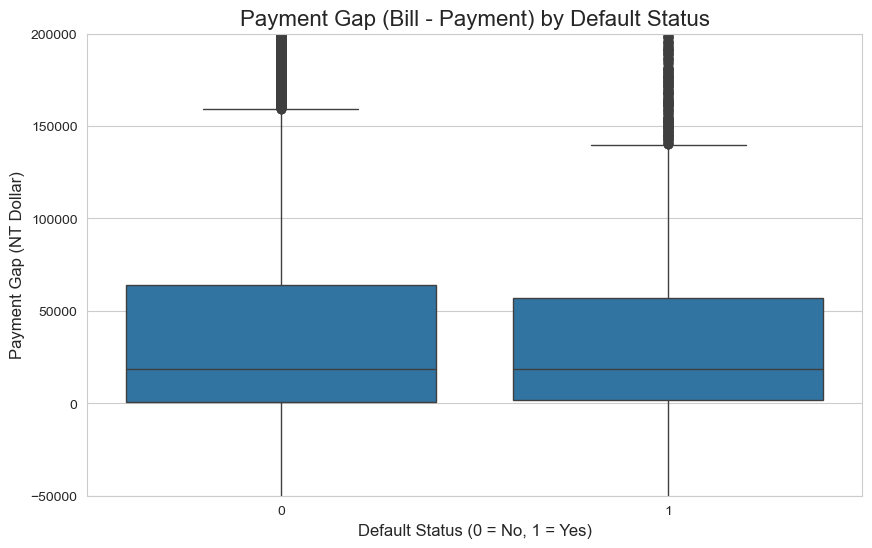

In [15]:
# Create the 'payment_gap' feature
df['payment_gap'] = df['BILL_AMT1'] - df['PAY_AMT1']

plt.figure(figsize=(10, 6))
sns.boxplot(x='default_payment', y='payment_gap', data=df)
plt.title('Payment Gap (Bill - Payment) by Default Status', fontsize=16)
plt.xlabel('Default Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Payment Gap (NT Dollar)', fontsize=12)
plt.ylim(-50000, 200000) # Limit y-axis to zoom in on the boxes
plt.show()

This chart looks at the "Payment Gap," which is the difference between a customer's bill and the amount they actually paid. A large gap means a customer is carrying over a significant amount of debt to the next month.

**Key Findings from the Chart:**
* **Defaulters Carry More Debt:** The box for the group that defaulted (group '1') is noticeably higher than the box for the group that paid (group '0').
* **A Clear Difference in Behavior:** The middle line (median) for the non-default group is very close to zero. This means a typical customer in this group pays their bill in full, or very close to it.
* **Growing Debt for Defaulters:** For the default group, the median payment gap is much larger, around NT$20,000. This shows that these customers consistently pay much less than their total bill, causing their debt to grow month after month.

**Business Insight:**

This chart shows us that customers who default aren't just late with a payment; they are often caught in a cycle of growing debt. They are unable to pay off their balance, which makes it more likely they will eventually default completely.

This provides a powerful, early warning sign for the business. By monitoring this "Payment Gap" for each customer, the company can identify those who are struggling financially long before they miss a payment. Offering help, such as a structured payment plan, to customers with a consistently large payment gap could be a very effective strategy to help them get back on track and prevent future defaults.

## **D. Conclusion and Recommendations**

This analysis was conducted to find data-driven answers to our core business questions regarding the **22.12% customer default rate.** The visual exploration of our data has provided clear and actionable insights.

**1. What customer details are the best signs that a customer will default?**

Our findings show that a customer's actions are the best signs of a future default, far more than their demographic profile.
* **The Top Sign (Most Important): Recent Payment History**. The single most reliable predictor is a late payment. A delay of just one month is a critical warning sign that dramatically increases risk.
* **Next Best Signs: Indicators of Financial Stress**. Before they miss a payment, at-risk customers often show two key behaviors:
    * **High Credit Utilization**: They use a very high percentage of their available credit limit.
    * **A Large "Payment Gap"**: They consistently pay much less than their monthly bill, causing debt to build up.
* **Secondary Signs: Demographic Details**. Factors like **age**, **education**, and **marriage status** do show patterns (younger, single, high-school-educated customers have a slightly higher risk), but these are much less critical than the behavioral signs.

**2. Which groups of customers have the highest risk of defaulting?**

The highest-risk group is not defined by who they are, but by what they do. This segment consists of customers who are actively showing signs of financial distress through a combination of behaviors:
* They have a **recent history of late payments**.
* They are **"maxing out"** their credit cards.
* They are **accumulating debt** month after month instead of paying it down.

This behavioral profile is the most accurate way to define the highest-risk group.

**3. What actions can the company take to lower the number of defaults?**

Based on these findings, we recommend a proactive strategy focused on early detection and support.
* **Action 1: Implement an Early Intervention System**. Since a late payment is the biggest red flag, we should act immediately. Automatically contact customers who are 30 days late with helpful reminders and flexible payment options.
* **Action 2: Create a "Financial Health" Monitoring Program**. Proactively identify customers with high credit utilization (e.g., >85%) or a large, growing "payment gap." Offer these customers educational resources or financial planning tools before they miss a payment.
* **Action 3: Provide Targeted Onboarding**. For new customers in higher-risk demographic groups (younger, single), provide a smarter onboarding process that includes a simple guide to managing credit and start them with a more conservative credit limit that can be raised after a period of good payment history.

By implementing these data-driven actions, we can effectively reduce the default rate while building stronger, more supportive relationships with our customers.